In [31]:
import itertools
import math
import re

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import dynet as dy
import torch

LENGTH = 8
PATTERN = np.array([1,0,1,0])
FILTER_LENGTH = len(PATTERN)

In [32]:
binary_arrays = np.array(list(itertools.product([0,1], repeat=LENGTH)))

get_number_of_occur = lambda test_list: len([PATTERN for idx in range(len(test_list)-len(PATTERN)+1) if (test_list[idx : idx + len(PATTERN)] == PATTERN).all()])
occurences_arrays = np.array(list(map(get_number_of_occur, binary_arrays)))
print(occurences_arrays)

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 1 2 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 1 1 1 1 2 2 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 2 1 0 0 0
 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 1 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1 2 2 3 2 1 1 1 1 0 0 0 0 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 2 2 1 1 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 1 2 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0]


In [33]:
zero_arrays = binary_arrays[occurences_arrays == 0]
print('Number of 0 occurences', (occurences_arrays == 0).sum())
one_arrays = binary_arrays[occurences_arrays == 1]
print('Number of 1 occurences', (occurences_arrays == 1).sum())
two_arrays = binary_arrays[occurences_arrays == 2]
print('Number of 2 occurences', (occurences_arrays == 2).sum())
three_arrays = binary_arrays[occurences_arrays == 3]
print('Number of 3 occurences', (occurences_arrays == 3).sum())

Number of 0 occurences 188
Number of 1 occurences 57
Number of 2 occurences 10
Number of 3 occurences 1


In [34]:
zero_X_train, zero_X_test, zero_y_train, zero_y_test = train_test_split(zero_arrays, np.zeros((len(zero_arrays),)), test_size=0.2, random_state=42)
one_X_train, one_X_test, one_y_train, one_y_test = train_test_split(one_arrays, np.ones((len(one_arrays))), test_size=0.2, random_state=42)
two_X_train, two_X_test, two_y_train, two_y_test = train_test_split(two_arrays, np.ones((len(two_arrays))), test_size=0.2, random_state=42)
# three_X_train, three_X_test, three_y_train, three_y_test = train_test_split(three_arrays, np.ones((len(three_arrays))), test_size=0.2, random_state=42)

In [35]:
# zero_X_train = zero_X_test = zero_arrays
# zero_y_train = zero_y_test = np.zeros((len(zero_X_train)), dtype=int)
# one_X_train = one_X_test = one_arrays
# one_y_train = one_y_test = np.ones((len(one_X_train)), dtype=int)
# two_X_train = two_X_test = two_arrays
# two_y_train = two_y_test = np.ones((len(two_arrays)), dtype=int)

X_train = np.concatenate((zero_X_train, one_X_train, two_X_train), axis=0)
y_train = np.concatenate((zero_y_train, one_y_train, two_y_train), axis=0)
X_train, y_train = shuffle(X_train, y_train, random_state=0)

X_test = np.concatenate((zero_X_test, one_X_test, two_X_test), axis=0)
y_test = np.concatenate((zero_y_test, one_y_test, two_y_test), axis=0)
X_test, y_test = shuffle(X_train, y_train, random_state=0)

In [36]:
# data = [[1,0,0,0,1,0,1,0],
#         [1,1,0,1,0,0,0,0],
#         [1,0,0,0,0,0,1,0],
#         [0,1,0,0,0,1,0,0],
#         [0,0,1,0,1,0,1,0],
#         [0,0,0,0,0,0,1,0],
#         [0,1,0,1,0,0,0,0],
#         [1,0,0,0,0,0,0,1]]
# labels = [1,1,0,0,1,0,1,0]

# X_train = X_test = np.array(data)
# y_train = y_test = np.array(labels)

In [37]:
display(X_train)
display(y_train)

array([[0, 0, 1, ..., 1, 1, 0],
       [1, 1, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 0, 0, ..., 1, 1, 1],
       [1, 0, 1, ..., 1, 1, 1],
       [1, 1, 0, ..., 0, 1, 0]])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1.])

In [65]:
class VanillaNN(torch.nn.Module):
    def __init__(self):
        super(VanillaNN, self).__init__()
        self.lin1 = torch.nn.Linear(8, 8)
        self.lin4 = torch.nn.Linear(8, 1)
    def forward(self, x):
        x = torch.relu(self.lin1(x))
        x = torch.sigmoid(self.lin4(x))
        return x

criterion = torch.nn.BCELoss()
model = VanillaNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

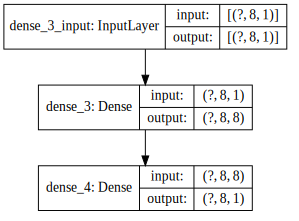

In [69]:
import tensorflow as tf
from IPython.display import SVG
from tensorflow import keras
import tensorflow.keras.backend as K
from tensorflow.keras.layers import Input, Dense, LSTM, GRU, Embedding, Lambda, Reshape, Conv1D, MaxPooling1D, Activation
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import model_to_dot
from tqdm import tqdm,trange
from tensorflow.keras import activations


def get_conv_model():
    model = keras.Sequential()
    model.add(Dense(8, activation='relu', input_shape=(LENGTH, 1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = get_conv_model()
with open("vanilla1.pdf", "wb") as text_file:
    text_file.write(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='pdf'))
# visualize
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [ ]:
class VanillaNN(torch.nn.Module):
    def __init__(self):
        super(VanillaNN, self).__init__()
        self.lin1 = torch.nn.Linear(8, 50)
        self.lin4 = torch.nn.Linear(50, 1)
    def forward(self, x):
        x = torch.relu(self.lin1(x))
        x = torch.sigmoid(self.lin4(x))
        return x

criterion = torch.nn.BCELoss()
model = VanillaNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

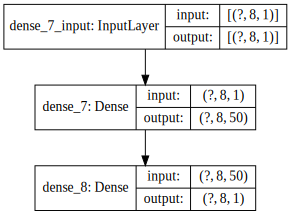

In [71]:
def get_conv_model():
    model = keras.Sequential()
    model.add(Dense(50, activation='relu', input_shape=(LENGTH, 1)))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

model = get_conv_model()
with open("vanilla2.pdf", "wb") as text_file:
    text_file.write(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='pdf'))
# visualize
SVG(model_to_dot(model, show_shapes=True, dpi=70).create(prog='dot', format='svg'))

In [66]:
perfect_iter = None
X = torch.tensor(X_train).float()
y = torch.tensor(y_train).float().reshape((-1,1))
for epoch in range(5000):
    # Forward pass
    y_pred = model(X)
    # Compute Loss
    loss = criterion(y_pred, y)
    # Backward pass
    loss.backward()
    optimizer.step()
    
    output = np.array((y_pred.squeeze()>0.5).float())
    correct = (output == y_train).sum()
    if perfect_iter is None and correct == len(y_train):
        perfect_iter = epoch+1
    
    if (epoch + 1) % 500 == 0:
        print(epoch)
#         print(output)
        print(loss.item())
        print(f'Accuracy {correct}/{len(y_train)}')
        
print(f'Perfect iteration: {perfect_iter}')

499
0.26413804292678833
Accuracy 188/203
999
0.15941905975341797
Accuracy 189/203
1499
0.08166002482175827
Accuracy 196/203
1999
0.016796501353383064
Accuracy 202/203
2499
0.013398607261478901
Accuracy 202/203
2999
0.0036929070483893156
Accuracy 203/203
3499
0.002199301030486822
Accuracy 203/203
3999
0.0009060602751560509
Accuracy 203/203
4499
0.0014229214284569025
Accuracy 203/203
4999
0.00024400344409514219
Accuracy 203/203
Perfect iteration: 1793


In [ ]:
print(model.lin1.weight.data)

In [15]:
X_t = torch.tensor(X_test).float()
y_t = torch.tensor(y_test).float().reshape((-1,1))

y_pred = model(X_t)
output = np.array((y_pred.squeeze()>0.5).float())
correct = (output == y_test).sum()

if perfect_iter is None and correct == len(y_test):
    perfect_iter = epoch+1

print(output)
print(f'Accuracy {correct}/{len(y_train)}')

[0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.]
Accuracy 203/203
